<a href="https://colab.research.google.com/github/kingszeto/ESS_TC_Pop/blob/master/ibtracs_mapped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install netCDF4
from google.colab import drive
drive.mount('/content/drive')
from netCDF4 import Dataset
import numpy as np
import scipy as scipy
import scipy.io as sio
import datetime as dt 
import pandas as pd
#files to read from - IBTrACS and OMI MatLab
ibtracs     = Dataset("/content/drive/My Drive/Data/IBTrACS.WP.v04r00.nc", "r", format="NETCDF4")
mjo_data    = sio.loadmat("/content/drive/My Drive/Data/MJOindex&time_monthPhase-OMI.mat")
mjo_index    = mjo_data['MJOindex_monthPhase']
mjo_time   = mjo_data['MJOtime_monthPhase']

     |████████████████████████████████| 4.1MB 2.8MB/s 
     |████████████████████████████████| 317kB 28.9MB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
a = sio.loadmat("/content/drive/My Drive/Data/MJOindex&time_monthPhase-OMI.mat")['MJOindex_monthPhase']
a = a.flatten()

6195

In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6

!pip install rasterio

!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (178 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 134485 files and directories currently installed.)
Pre

     |████████████████████████████████| 2.8MB 2.7MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702072 sha256=0d069301c1e75437e2e0413b3f058324465f23a0479db2a413b93b44b31220f3
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.4.2.post1
    Uninstalling pyproj-2.4.2.post1:
      Successfully uninstalled pyproj-2.4.2.post1
     |████████████████████████████████| 18.0MB 1.5MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  libproj-dev proj-bin
0 upgraded, 2 newly installed, 0 to remove and 16 not upgraded.
Need

In [0]:
import rasterio
import gdal

from pyproj import Proj, transform
from scipy.io import loadmat
 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from mpl_toolkits.basemap import Basemap

from numpy import meshgrid
import pandas as pd
import seaborn as sns
%matplotlib inline

from netCDF4 import Dataset

In [0]:
dset_gtiff = "/content/drive/My Drive/Data/gpw_v4_population_count_rev11_2020_2pt5_min.tif"
gdal.AllRegister()
global ds
ds = gdal.Open(dset_gtiff)
band = ds.GetRasterBand(1)
arr = band.ReadAsArray()
ds_size = arr.shape
if band.GetMinimum() is None or band.GetMaximum() is None:
   band.ComputeStatistics(0)
      
print ("[ NO DATA VALUE ] = ", band.GetNoDataValue()) # none
print ("[ MIN ] = ", band.GetMinimum())
print ("[ MAX ] = ", band.GetMaximum())
print (ds_size)

ds.GetProjection()
dataGTIFF = ds.ReadAsArray()

[ NO DATA VALUE ] =  -3.4028230607370965e+38
[ MIN ] =  0.0
[ MAX ] =  1710353.125
(4320, 8640)


In [0]:
def gather_data(filter_cat = False, knots = True, category = 5, include_gt = True): 
  saffir_simpson_scale = {}
  if knots:
    saffir_simpson_scale = {0: lambda x: 0 <= x < 65, 1: lambda x: 64 <= x < 83, #NEEDS TO BE IN KNOTS
                          2: lambda x: 83 <= x < 96, 3: lambda x: 96 <= x < 113,
                          4: lambda x: 113 <= x < 136, 5: lambda x: x >= 136}
  else: 
    saffir_simpson_scale = {0: lambda x: 0 <= x < 119, 1: lambda x: 119 <= x < 154,
                          2: lambda x: 154 <= x < 178, 3: lambda x: 178 <= x < 209,
                          4: lambda x: 209 <= x < 252, 5: lambda x: x >= 252}      
  all_data = [loadmat('/content/drive/My Drive/Data/TrackData_RMM_phase' + str(i + 1) + '.mat') for i in range(8)]
  eight_phase = []
  for dset in all_data:
    dset_lat = [row for row in dset['latstore']]
    dset_long = [row for row in dset['longstore']]
    dset_vel = [row for row in dset['vstore']]
    if not filter_cat:
      hur_path = [zip(dset_lat[a], dset_long[a]) for a in range(4000)]
    else:
      all_paths = [zip(dset_lat[a], dset_long[a]) for a in range(4000)]
      hur_path = []
      for p in range(len(all_paths)):
        hurricane = list(all_paths[p])
        path = []
        for i in range(len(hurricane)):
          if hurricane[i] == (0.0,0.0):
            path.append((float('nan'), float('nan')))
          elif include_gt and any(saffir_simpson_scale[k](dset_vel[p][i]) for k in range(category, len(saffir_simpson_scale))):
              path.append(hurricane[i])
          elif saffir_simpson_scale[category](dset_vel[p][i]) :
            path.append(hurricane[i])
          else:
            path.append((float('nan'),float('nan')))
        hur_path.append(path)
    eight_phase.append(hur_path)
  return eight_phase

def gather_netcdf_data():
  ibtracs = Dataset("/content/drive/My Drive/Data/IBTrACS.WP.v04r00.nc", "r", format="NETCDF4")
  lats = ibtracs.variables['lat']
  lons = ibtracs.variables['lon']
  hur_path = [list(zip(lats[i], lons[i])) for i in range(len(ibtracs.variables['lat']))]
  return hur_path

def gather_netcdf_year():
  ibtracs = Dataset("/content/drive/My Drive/Data/IBTrACS.WP.v04r00.nc", "r", format="NETCDF4")
  lats = ibtracs.variables['lat']
  lons = ibtracs.variables['lon']
  hur_path = [zip(lats[i], lons[i]) for i in range(len(ibtracs.variables['lat']))]    #make so that there is no need to cast zip object into list

  tracks = {}
  for i in range(len(hur_path)):
    year = int(ibtracs.variables['iso_time'][i][0][0].decode('UTF-8') + ibtracs.variables['iso_time'][i][0][1].decode('UTF-8') + ibtracs.variables['iso_time'][i][0][2].decode('UTF-8') + ibtracs.variables['iso_time'][i][0][3].decode('UTF-8'))
    if not year in tracks:
      tracks[year] = [[hur_path[i]]]
    else:
      tracks[year][0].append(hur_path[i])
  return tracks


def refine_data(data_set):
  new_set = [[] for i in range(8)]
  for phase in range(len(data_set)):
    for hurricane in data_set[phase]:
      new_set[phase].extend(split_hurricane(hurricane))
  return new_set
  
def split_hurricane(path):
  hurricanes = [[]]
  for i in range(len(path)):
    if not np.isnan(path[i][0]) and not np.isnan(path[i][1]):
      hurricanes[-1].append((path[i][0], path[i][1]))
    elif not np.isnan(path[i - 1][0]) and np.isnan(path[i][0]):
      hurricanes.append([])
  return hurricanes

def transform_coordinate(j, i, padfTransform):
  Yp = padfTransform[0] + i*padfTransform[1] + i*padfTransform[2];
  Xp = padfTransform[3] + j*padfTransform[4] + j*padfTransform[5];
  if Yp < 0:
    Yp += 360
  if Yp > 360:
    Yp -= 360
  return (Xp, Yp)

def population_binning(data, width = 1.25):
  pop_bins = np.zeros((int(90/width), int(280/width)))
  for i in range(len(data) // 2):
    for j in range(len(data[i])):
      coords = transform_coordinate(i, j, ds.GetGeoTransform())
      try:
        if (0 <= coords[0] <= 90) and (0 <= coords[1] <= 280) and data[i][j] >= 1:
          pop_bins[int(coords[0] / width)][int(coords[1] / width)] += round(data[i][j])
      except:
        print(coords)
  return pop_bins

def check_same_bin(x1, y1, x2, y2, width):
  return int(x1/width) == int(x2/width) and int(y1/width) == int(y2/width) 

def hour_binning(hurr_phases, width = 1.25):
  all_data = []
  for phase in hurr_phases:
    hour_bins = np.zeros((int(90/width), int(280/width))) #setting up a 2d-array for binning.
    for hurricane in phase:
      hurricane = list(hurricane)
      hurricane = [coord for coord in hurricane if coord[0] != 0. and coord[1] != 0.]
      for i in range(len(hurricane[1:])):
        prev = hurricane[i-1]
        if check_same_bin(prev[0], prev[1], hurricane[i][0], hurricane[i][1], width):
          hour_bins[int(hurricane[i][0]/width)][int(hurricane[i][1] / width)] += 1
        else:
          split_hour(hour_bins, int(prev[0]/width), int(prev[1]/width), int(hurricane[i][0]/width), int(hurricane[i][1]/width))
    all_data.append(hour_bins)
  all_data = np.array([[[float('nan') if num < 1 else num for num in row] for row in data] for data in all_data])
  return all_data

#hour_binning is intended to be used with the new IBTrACs
def ib_hour_binning(hurr_phases, width = 1.25): #takes in hurricane phases
  all_data = []
  for phase in hurr_phases:
    hour_bins = np.zeros((int(90/width), int(280/width))) #setting up a 2d-array for binning.
    for hurricane in hurr_phases[phase]:
      hurricane = hurricane.path
      for i in range(len(hurricane[1:])):
        prev = hurricane[i-1]
        if check_same_bin(prev[0], prev[1], hurricane[i][0], hurricane[i][1], width):
          hour_bins[int(hurricane[i][0]/width)][int(hurricane[i][1] / width)] += 1
        else:
          split_hour(hour_bins, int(prev[0]/width), int(prev[1]/width), int(hurricane[i][0]/width), int(hurricane[i][1]/width))
    all_data.append(hour_bins)
  all_data = np.array([[[float('nan') if num < 1 else num for num in row] for row in data] for data in all_data])
  return all_data

def split_hour(hurr_phases, coord1x, coord1y, coord2x, coord2y):
  dx = coord2x - coord1x
  dy = coord2y - coord1y
  increment = 1 /(abs(dx) + abs(dy))
  incx, incy = 0,0
  hurr_phases[coord1x][coord1y] += increment
  while(dx != 0 or dy != 0):
      if(abs(dx) == abs(dy)):
        while(dx != 0 and dy !=0):
          incx += 1 if dx > 0 else -1
          incy += 1 if dy > 0 else -1
          hurr_phases[coord1x+incx][coord1y+incy] += increment
          dx -= 1 if dx > 0 else -1
          dy -= 1 if dy > 0 else -1
      else:
        if(abs(dx) > abs(dy)):
          incx += 1 if dx > 0 else -1
          dx -= 1 if dx > 0 else -1
          hurr_phases[coord1x+incx][coord1y+incy] += increment
        elif (abs(dy) > abs(dx)):
          incy += 1 if dy > 0 else -1
          dy -= 1 if dy > 0 else -1
          hurr_phases[coord1x+incx][coord1y+incy] += increment

def popxhours(population, hour_set):
  pop_hour_bins = [population*phase for phase in hour_set]
  pop_hour_bins = [[[float('nan') if np.isnan(num) or num <= 1 else num for num in row] for row in data] for data in pop_hour_bins]
  return np.array(pop_hour_bins)

def anomaly(dataset8):
  average = np.nanmean(dataset8, axis=0)
  return dataset8 - average

def popxhours_anomaly(pop_hour_bins, percentage = False): 
  sum_pop_hours = np.zeros(pop_hour_bins.shape[1:])
  phases_participated = np.zeros(pop_hour_bins.shape[1:]) #Need to get the number of phases each bin has been in
  for i in range(sum_pop_hours.shape[0]):
    for j in range(sum_pop_hours.shape[1]):
      vals = [phase[i,j] for phase in pop_hour_bins if not np.isnan(phase[i,j])]
      sum_pop_hours[i,j] = np.nansum(vals)
      phases_participated[i,j] = len(vals)
  sum_pop_hours = np.array([[sum_pop_hours[i,j] / phases_participated[i,j] if phases_participated[i,j] > 0 else float('nan') for j in range(len(sum_pop_hours[i]))]for i in range(sum_pop_hours.shape[0])])
  all_data = []
  
  for phase in pop_hour_bins:
    phase_data = np.zeros(pop_hour_bins.shape[1:])
    for i in range(phase_data.shape[0]):
      for j in range(phase_data.shape[1]):
        if not percentage:
          phase_data[i,j] = float('nan') if np.isnan(sum_pop_hours[i,j]) else phase[i,j] - sum_pop_hours[i,j]
        elif percentage and phases_participated[i,j] >= 6:
          phase_data[i,j] = float('nan') if np.isnan(sum_pop_hours[i,j]) else phase[i,j] - sum_pop_hours[i,j]
          phase_data[i,j] = phase_data[i,j] * 100 /sum_pop_hours[i,j]
        else:
          phase_data[i,j] = float('nan')
    all_data.append(phase_data)
  return all_data

def make_nans(threeDarr):
  return [[[float('nan') if np.isnan(num) else num for num in row] for row in data] for data in threeDarr]
  
def create_maps(plot_labels, width = 1.25):
  arr_with_nans = plot_labels['data']
  #arr_with_nans = make_nans(plot_labels['data'])
  y = np.arange(0,90, width)
  x = np.arange(0,280,width)
  for i in range(len(arr_with_nans)):
    fig = plt.figure(figsize = (10, 8))
    hm = Basemap(projection='lcc', resolution='c',
            width=21E6, height=10E6, 
            lat_0=35, lon_0=145)
    hm.shadedrelief(scale = 0.125)
    parallels = np.arange(-90, 91, 10)
    hm.drawparallels(parallels, labels = [True, False, False, False])
    meridians = np.arange(0, 361,10)
    hm.drawmeridians(meridians, lables = [False, False, True, True])
    xx,yy = meshgrid(x,y) #the colormap and colorbar will be different depending on anomaly's value
    hm.pcolormesh(xx,yy, arr_with_nans[i], latlon=True, cmap= plot_labels['cmapscheme'])
    hm.drawcoastlines()
    plt.clim(plot_labels['cmapmin'], plot_labels['cmapmax'])
    plt.colorbar(label= plot_labels['cmaplabel'])
    plt.title(plot_labels['label'] + ' - Phase %d' %(i+ 1))
  
def data_dict(data = None, label=None, xaxis=None, yaxis=None, cmapscheme=None, cmapmin=None, cmapmax=None, cmaplabel=None):
  ps = {}
  ps['data'] = data
  ps['label'] = label
  ps['xaxis'] = xaxis
  ps['yaxis'] = yaxis
  ps['cmapscheme'] = cmapscheme
  ps['cmapmin'] = cmapmin
  ps['cmapmax'] = cmapmax
  ps['cmaplabel'] = cmaplabel
  return ps

def create_singular_map(plot_labels, width = 1.25):
#  arr_with_nans = make_nans(plot_labels['data'])
  arr_with_nans = plot_labels['data']
  y = np.arange(0,90, width)
  x = np.arange(0,280,width)
  fig = plt.figure(figsize = (10, 8))
  hm = Basemap(projection='lcc', resolution='c',
            width=21E6, height=10E6, 
            lat_0=35, lon_0=145)
  hm.shadedrelief(scale = 0.125)
  parallels = np.arange(-90, 91, 10)
  hm.drawparallels(parallels, labels = [True, False, False, False])
  meridians = np.arange(0, 361,10)
  hm.drawmeridians(meridians, lables = [False, False, True, True])
  xx,yy = meshgrid(x,y) #the colormap and colorbar will be different depending on anomaly's value
  hm.pcolormesh(xx,yy, arr_with_nans[0], latlon=True, cmap= plot_labels['cmapscheme'])
  hm.drawcoastlines()
  plt.clim(plot_labels['cmapmin'], plot_labels['cmapmax'])
  plt.colorbar(label= plot_labels['cmaplabel'])
  plt.title(plot_labels['label'])

def create_maps_subplotted(population_reference, hour_exposure, hour_anomalies, pop_hours, pop_hours_anomaly, pop_hours_diff, width = 1.25):
  y = np.arange(0,90, width)
  x = np.arange(0,280,width)
  xx,yy = meshgrid(x,y)
  parallels = np.arange(-90, 91, 10)
  meridians = np.arange(0, 361,10)
  pop = np.array([[float('nan') if num <= 0 else num for num in row] for row in population_reference])
  for i in range(8):
    plt.figure(figsize = (45, 30))
    plt.subplot(3,2,1)
    hm = Basemap(projection='lcc', resolution='c',
            width=21E6, height=10E6, 
            lat_0=35, lon_0=145)
    hm.shadedrelief(scale = 0.125)
    hm.drawparallels(parallels, labels = [True, False, False, False])
    hm.drawmeridians(meridians, lables = [False, False, True, True])
    hm.pcolormesh(xx,yy, hour_exposure['data'][i], latlon=True, cmap= hour_exposure['cmapscheme'])
    hm.drawcoastlines()
    plt.clim(hour_exposure['cmapmin'], hour_exposure['cmapmax'])
    plt.colorbar(label= hour_exposure['cmaplabel'])
    plt.title(hour_exposure['label'] + ' - Phase %d' %(i+ 1))
    
    plt.subplot(3,2,2)
    hm = Basemap(projection='lcc', resolution='c',
            width=21E6, height=10E6, 
            lat_0=35, lon_0=145)
    hm.shadedrelief(scale = 0.125)
    hm.drawparallels(parallels, labels = [True, False, False, False])
    hm.drawmeridians(meridians, lables = [False, False, True, True])
    hm.pcolormesh(xx,yy, hour_anomalies['data'][i], latlon=True, cmap= hour_anomalies['cmapscheme'])
    hm.drawcoastlines()
    plt.clim(hour_anomalies['cmapmin'], hour_anomalies['cmapmax'])
    plt.colorbar(label= hour_anomalies['cmaplabel'])
    plt.title(hour_anomalies['label'] + ' - Phase %d' %(i+ 1)) 
    
    plt.subplot(3,2,3)
    hm.shadedrelief(scale = 0.125)
    hm.drawparallels(parallels, labels = [True, False, False, False])
    hm.drawmeridians(meridians, lables = [False, False, True, True])
    hm.pcolormesh(xx,yy, pop_hours['data'][i], latlon=True, cmap= pop_hours['cmapscheme'])
    hm.drawcoastlines()
    plt.clim(pop_hours['cmapmin'], pop_hours['cmapmax'])
    plt.colorbar(label= pop_hours['cmaplabel'])
    plt.title(pop_hours['label'] + ' - Phase %d' %(i+ 1)) 
  
    plt.subplot(3,2,4)
    hm.shadedrelief(scale = 0.125)
    hm.drawparallels(parallels, labels = [True, False, False, False])
    hm.drawmeridians(meridians, lables = [False, False, True, True])
    hm.pcolormesh(xx,yy, pop_hours_anomaly['data'][i], latlon=True, cmap= pop_hours_anomaly['cmapscheme'])
    hm.drawcoastlines()
    plt.clim(pop_hours_anomaly['cmapmin'], pop_hours_anomaly['cmapmax'])
    plt.colorbar(label= pop_hours_anomaly['cmaplabel'])
    plt.title(pop_hours_anomaly['label'] + ' - Phase %d' %(i+ 1))
  
    plt.subplot(3,2,5)
    hm.shadedrelief(scale = 0.125)
    hm.drawparallels(parallels, labels = [True, False, False, False])
    hm.drawmeridians(meridians, lables = [False, False, True, True])
    hm.pcolormesh(xx,yy, pop, latlon=True, cmap= 'YlGn')
    hm.drawcoastlines()
    plt.clim(np.nanmin(pop), 10000000)
    plt.colorbar(label= 'People')
    plt.title('Binned Population') 

    plt.subplot(3,2,6)
    hm.shadedrelief(scale = 0.125)
    hm.drawparallels(parallels, labels = [True, False, False, False])
    hm.drawmeridians(meridians, lables = [False, False, True, True])
    hm.pcolormesh(xx,yy, pop_hours_diff['data'][i], latlon=True, cmap= pop_hours_diff['cmapscheme'])
    hm.drawcoastlines()
    plt.clim(pop_hours_diff['cmapmin'], pop_hours_diff['cmapmax'])
    plt.colorbar(label= pop_hours_diff['cmaplabel'])
    plt.title(pop_hours_diff['label'] + ' - Phase %d' %(i+ 1))
    
import cv2
import os
from os.path import isfile, join
# from IPython.display import HTML
# figure out .avi / .mp4 and embedding within IPython file
# desired: create function so that this can be called on certain files
def create_video(videoname):
  image_folder = "/content/"
  video_name = videoname + '.mp4'

  images = [img for img in sorted(os.listdir(image_folder)) if img.endswith(".png")]
  frame = cv2.imread(os.path.join(image_folder, images[0]))
  height, width, layers = frame.shape

  video = cv2.VideoWriter(video_name, 0, 1, (width,height))

  for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

  cv2.destroyAllWindows()
  video.release()

In [0]:
class ibtracStorm:
  ibtracs = Dataset("/content/drive/My Drive/Data/IBTrACS.WP.v04r00.nc", "r", format="NETCDF4")
  agencies = {'usa', 'tokyo', 'hko', 'cma', 'newdelhi', 'reunion', 'bom', 'nadi', 'wellington', 'ds824', 'td9636', 'neumann', 'mlc'}
  alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ_ abcdefghijklmnopqrstuvwxyz'
  #an ibtracStorm instance will initialize itself based on the index it is in.
    #so far, this class acts most like a C-style STRUCT, unsure of what direction to take it into.
  #private variables:
    #hur_path is a list of tuples containing the latitude and longitude of the storm path
    #year is the year in which storm was recorded
    #dist2land is the distance to land at a coordinate's index
    #name is the name of the cyclone (if it has any)
    #wind_speed contains the speed at each point, averaged out across all the agencies that have reported a speed
  def __init__(self, dataset_index):
    self.path, self.dist2land, self.wind_speed = [], [], []
    end_index = -1
    for coord_index in range(360):
      #get the coordinates of the storm
      lat = ibtracStorm.ibtracs.variables['lat'][dataset_index][coord_index]
      lon = ibtracStorm.ibtracs.variables['lon'][dataset_index][coord_index]
      if type(lat) == np.float32 and type(lon) == np.float32:
        self.path.append((lat,lon))
      #take all distance to land
      dist = ibtracStorm.ibtracs.variables['dist2land'][coord_index]
      if type(dist) == np.int16:
        self.dist2land.append(dist)
      #calculate the windspeed, take all of the agencies' reportings and average them
      agency_winds = []
      for agency in ibtracStorm.agencies:
        if type(ibtracStorm.ibtracs.variables[agency+'_wind'][dataset_index][coord_index]) == np.int16:
          agency_winds.append(ibtracStorm.ibtracs.variables[agency+'_wind'][dataset_index][coord_index])
      mean = np.nanmean(agency_winds)
      if not np.isnan(mean):
        self.wind_speed.append(mean)
      if type(lat) != np.float32 and type(lon) != np.float32 and type(dist) != np.int16 and np.isnan(mean):
        end_index = coord_index - 1
        break
    start_str = "".join([char.decode('UTF-7') for char in ibtracStorm.ibtracs.variables['iso_time'][dataset_index][0]])
    end_str = "".join([char.decode('UTF-7') for char in ibtracStorm.ibtracs.variables['iso_time'][dataset_index][end_index]])
    self.start = np.datetime64(start_str)
    self.end   = np.datetime64(end_str)

    self.start_year   = int(start_str[0:4])
    self.start_month  = int(start_str[5:7])
    self.start_date   = int(start_str[8:10])     

    self.end_year   = int(end_str[0:4])
    self.end_month  = int(end_str[5:7])
    self.end_date   = int(end_str[8:10])

    name = [char for char in ibtracStorm.ibtracs.variables['name'][dataset_index].tostring().decode('UTF-7') if char in ibtracStorm.alphabet]
    self.name = ""
    for char in name:
      self.name += char      
    
#struct for MJO_events    
class MJO_event:
  def __init__(self, mjo_date, mjo_index, phase):
    origin  = np.datetime64('0000-01-01', 'D') - np.timedelta64(1, 'D')
    datestr = str(mjo_date * np.timedelta64(1, 'D') + origin)
    self.dtime  = np.datetime64(datestr)
    self.year   = int(datestr[0:4])
    self.month  = int(datestr[5:7])
    self.date   = int(datestr[8:10])
    self.index  = mjo_index
    self.phase  = phase

#kind of useless
def create_storm_dict(storm_list):
  storm_dict = {}
  for storm in storm_list:
    year = storm.s_year
    if year not in storm_dict:
      storm_dict[year] = [storm]
    else:
      storm_dict[year].append(storm)
  return storm_dict

In [0]:
storms = [ibtracStorm(i) for i in range(2750,4177)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice


In [0]:
#go through each MJO by phase
mjo_dict ={j+1:[] for j in range(8)}
storm_dict = {i+1: [] for i in range(8)}
#dictionary to check what season the event happens
northern_meteorol_seasons = {'spring': lambda x: 3 <= x < 6, 'summer': lambda x: 6 <= x < 9, 'fall': lambda x: 9 <= x < 12, 'winter': lambda x: 12 < x < 13 or 1 <= x < 3}
seasonal_storm_dict = {'spring':{i+1: [] for i in range(8)}, 'summer': {i+1: [] for i in range(8)}, 'fall': {i+1: [] for i in range(8)}, 'winter': {i+1: [] for i in range(8)}}
for month in range(12):
  for phase in range(8):
    ref_phase = phase+1
    mjo_phase_dates = mjo_time[month,phase].flatten()
    mjo_phase_index = mjo_index[month,phase].flatten()
    mjo_dict[ref_phase].extend([MJO_event(mjo_phase_dates[event], mjo_phase_index[event], ref_phase) for event in range(len(mjo_phase_dates)) if mjo_phase_index[event] >= 1])
    #create sorting system for MJO by phases
in_event = lambda time1, time2, event: time1 <= event <= time2

for storm in storms:
  for phase in mjo_dict:
    for event in mjo_dict[phase]:
      if in_event(storm.start, storm.end, event.dtime):
        storm_dict[phase]. append(storm)
        for season_lambda in northern_meteorol_seasons:
          month = storm.start_month
          date = storm.start_date
          time = month + date / 31 #determine how far the date is into the month
          if northern_meteorol_seasons[season_lambda](time):
            seasonal_storm_dict[season_lambda][phase].append(storm)
            break
        break

In [0]:
for 

In [0]:
ibtracs = ib_hour_binning(storm_dict, 2.5)
hour_set_plots = data_dict(ibtracs,'Hours Exposed - IBTrACs', None, None, 'rainbow', np.nanmin(np.array(ibtracs)), np.nanmax(np.array(ibtracs)), 'Hours') 
#create_maps(hour_set_plots, 5)

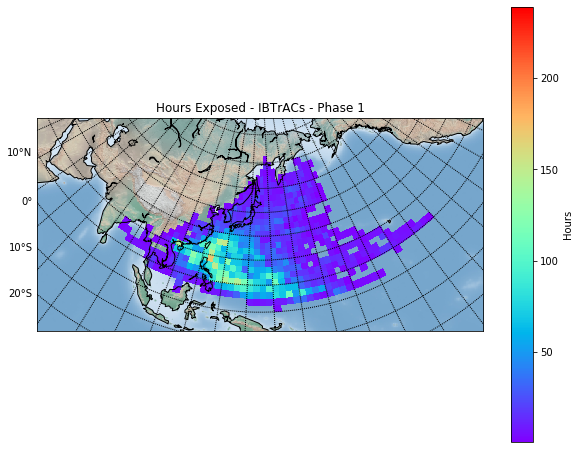

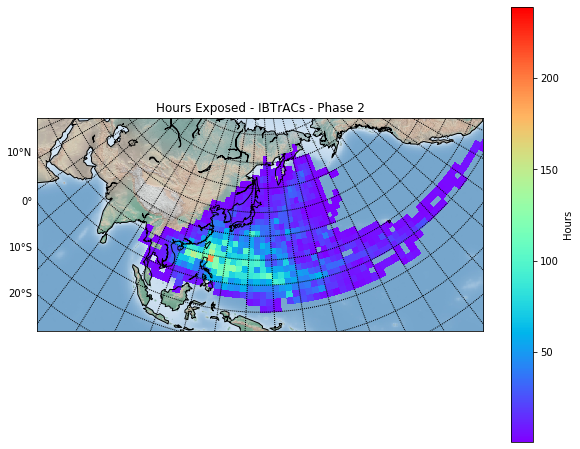

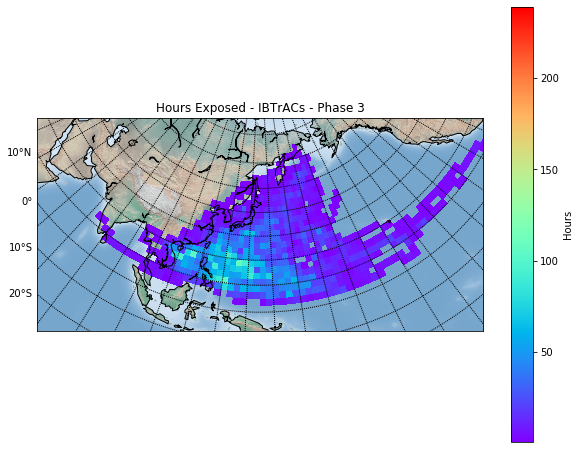

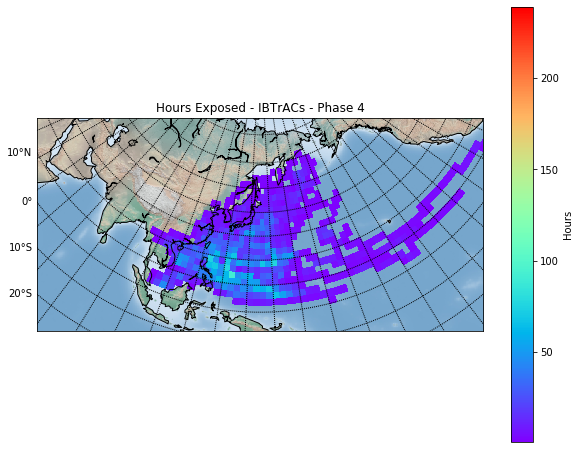

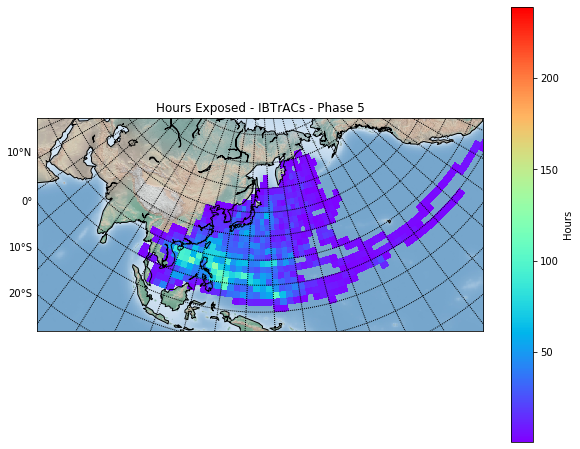

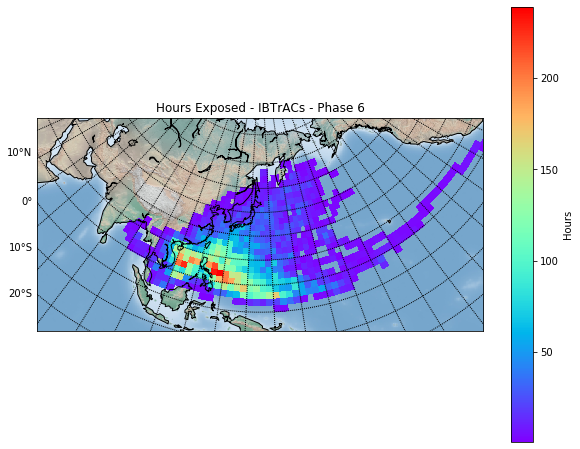

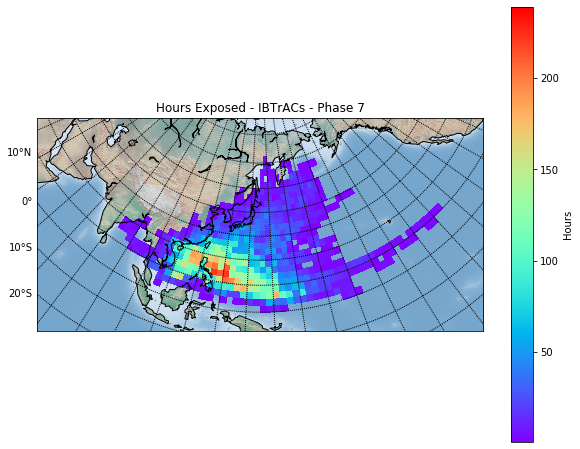

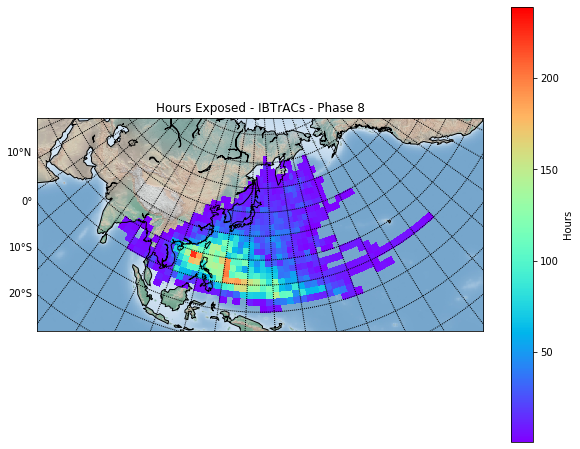

In [0]:
create_maps(hour_set_plots, 2.5)
figures=[manager.canvas.figure
       for manager in mpl._pylab_helpers.Gcf.get_all_fig_managers()]
for i, figure in enumerate(figures):
  figure.savefig('suplots_%d.png' % i)
create_video('ibtracs')

In [0]:
create_video('ibtracs')